In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.12.0


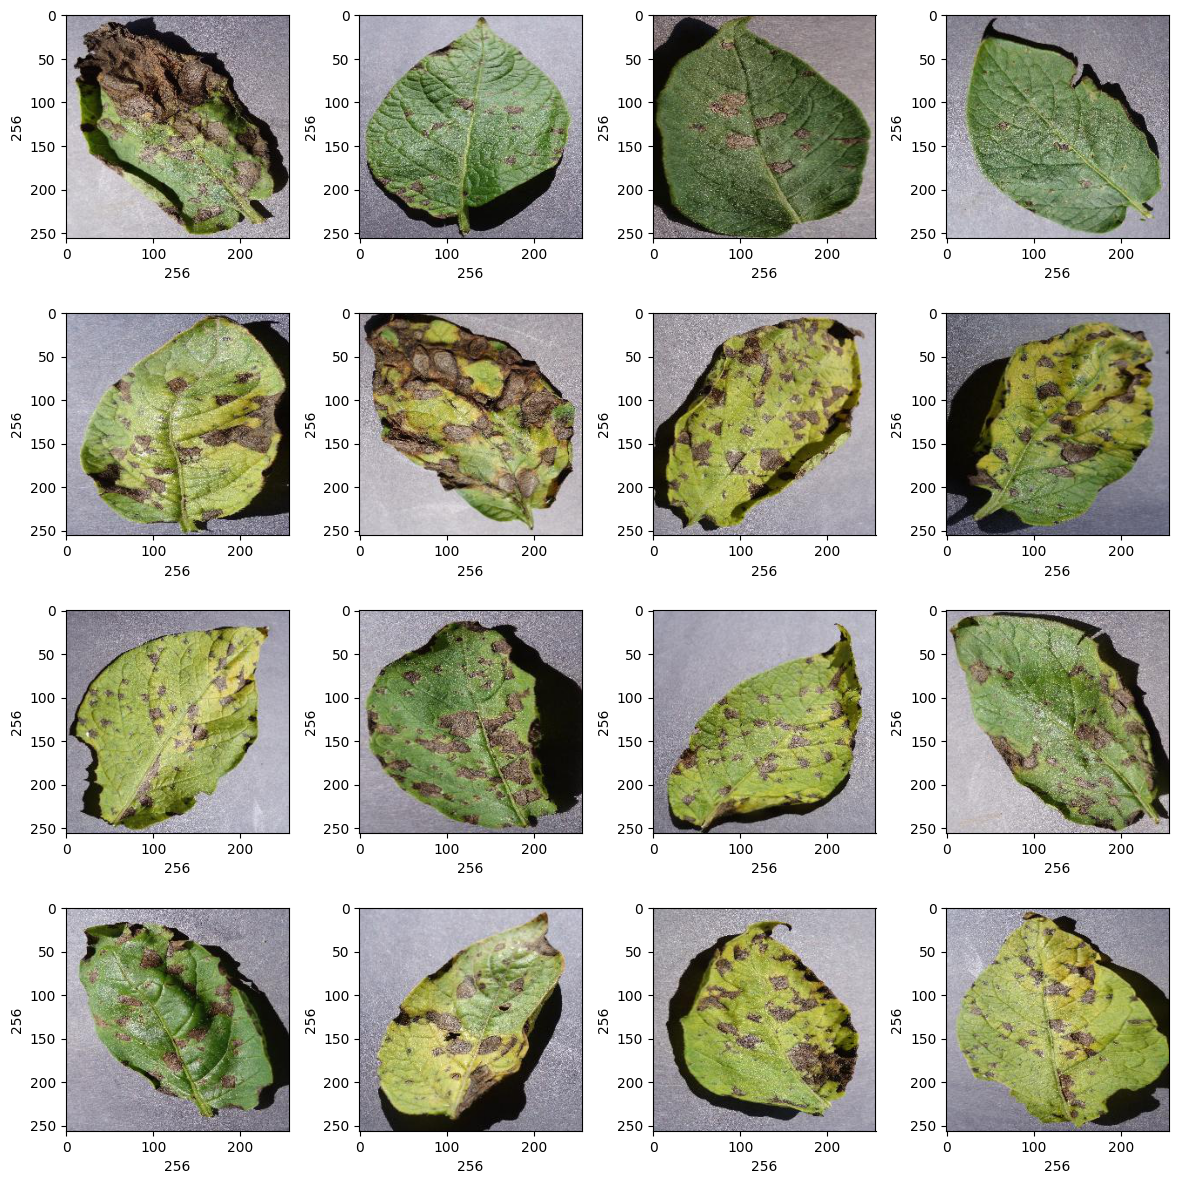

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/archive/Dataset/Potato___Early_blight"
for i in range(1, 17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None :
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
        return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [ ]:
dir = "/content/drive/MyDrive/archive/Dataset"
image_list, label_list = [], []
all_labels = ['Tomato___Bacterial_spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']
binary_labels = [0,1,2]
temp = -1

for directory in ['Tomato___Bacterial_spot', 'Potato___Early_blight', 'Corn_(maize)___Common_rust_']:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 112896)            0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [77]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val,y_val))

Epoch 1/50
5/5 [==============================] - 37s 6s/step - loss: 0.2202 - accuracy: 0.9566 - val_loss: 0.2215 - val_accuracy: 0.9306
Epoch 2/50
5/5 [==============================] - 28s 6s/step - loss: 0.1934 - accuracy: 0.9566 - val_loss: 0.1915 - val_accuracy: 0.9653
Epoch 3/50
5/5 [==============================] - 30s 6s/step - loss: 0.1703 - accuracy: 0.9653 - val_loss: 0.1684 - val_accuracy: 0.9722
Epoch 4/50
5/5 [==============================] - 29s 6s/step - loss: 0.1498 - accuracy: 0.9774 - val_loss: 0.1501 - val_accuracy: 0.9722
Epoch 5/50
5/5 [==============================] - 34s 7s/step - loss: 0.1342 - accuracy: 0.9792 - val_loss: 0.1323 - val_accuracy: 0.9792
Epoch 6/50
5/5 [==============================] - 29s 6s/step - loss: 0.1186 - accuracy: 0.9792 - val_loss: 0.1240 - val_accuracy: 0.9792
Epoch 7/50
5/5 [==============================] - 29s 6s/step - loss: 0.1067 - accuracy: 0.9809 - val_loss: 0.1080 - val_accuracy: 0.9792
Epoch 8/50
5/5 [==================

In [80]:
model.save("/content/drive/MyDrive/archive/Dataset/model")

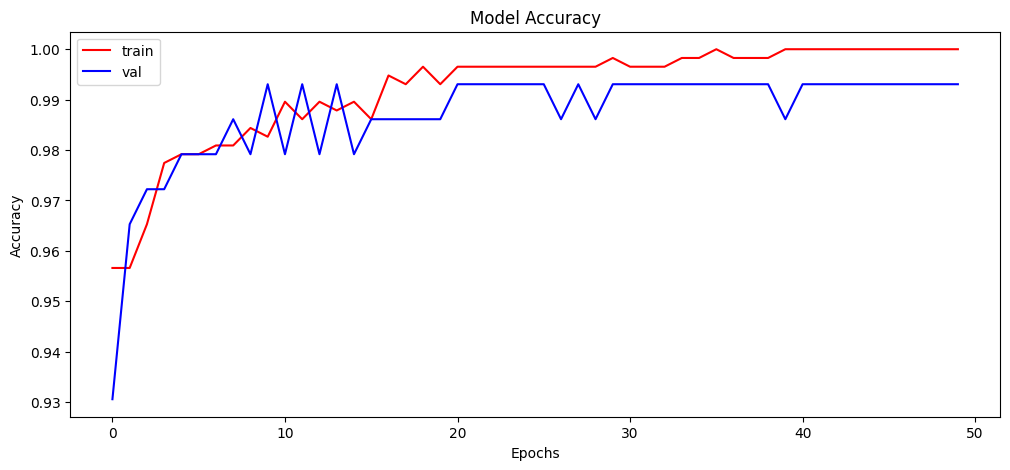

In [81]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [82]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
6/6 [==============================] - 2s 383ms/step - loss: 0.0849 - accuracy: 0.9889
Test Accuracy: 98.88888597488403


In [83]:
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 375ms/step


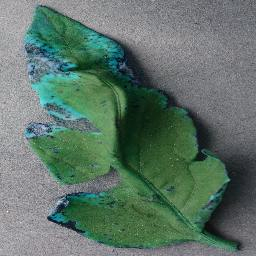

In [84]:
img = array_to_img(x_test[11])
img

In [85]:
print("Original Label: ", all_labels[np.argmax(y_test[11])])
print("Predicted Label: ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Original Label:  Tomato___Bacterial_spot
Predicted Label:  Tomato___Bacterial_spot
[7.069174e-17 9.294552e-07 9.999990e-01]


In [86]:
for i in range(50):
  print(all_labels[np.argmax(y_test[i])], "-", all_labels[np.argmax(y_pred[i])])

Potato___Early_blight - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Corn_(maize)___Common_rust_
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Corn_(maize)___Common_rust_
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Potato___Early_blight - Potato___Early_blight
Potato___Early_blight - Potato___Early_blight
Potato___Early_blight - Potato___Early_blight
Potato___Early_blight - Potato___Early_blight
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Corn_(maize)___Common_rust_
Corn_(maize)___Common_rust_ - Corn_(maize)___Common_rust_
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Corn_(maize)___Common_rust_
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Tomato___Bacterial_spot - Tomato___Bacterial_spot
Corn_(maize)___Common_rust_ - Corn_(maize)___Common_rust_
Corn_(maize)___Common_